In [7]:
import pandas as pd
import numpy as np 
import scipy as sp
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pickle
from collections import Counter, defaultdict

import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [8]:
path = './processed_data/'

Text(0.5, 0, '$\\Delta s$')

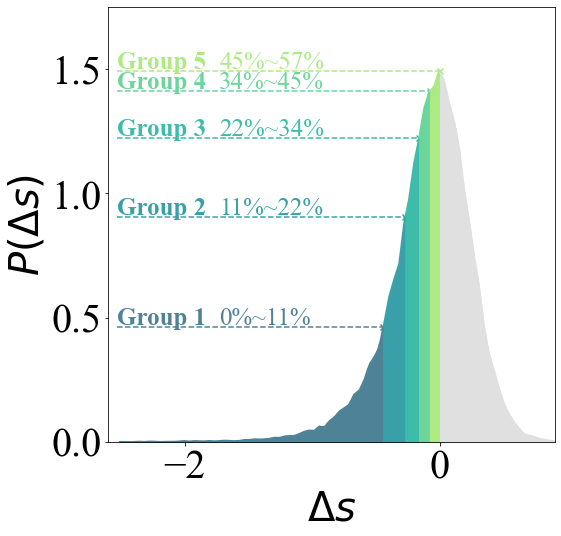

In [9]:
# fig1a
plt.rcParams['font.size'] = 40
plt.rcParams['font.sans-serif'] = 'Times New Roman'

colors = ['#4E8397', '#39A0A9', '#3DBCAA', '#6CD59C', '#ADEA84', '#E0E0E0']
labels = [(0,20), (20,40), (40,60), (60,80), (80,100)]

with open(path+'/fig1a_preprocessed.pkl', 'rb') as f:
    param_dict = pickle.load(f)
    

f = param_dict['f']
num = param_dict['num']
min_delta_entropy = param_dict['min_delta_entropy']
sep_bins = param_dict['sep_bins']
bins = param_dict['bins']
    
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
color_cnt = 0
former_str = '0%'
for s, e in zip(sep_bins[:-1], sep_bins[1:]):
    idx = np.where((bins>=s)&(bins<e))
    s_bins = np.linspace(s, e, 100)
    plt.plot(s_bins, f(s_bins), color=colors[color_cnt])
    plt.fill_between(y1=f(s_bins), x=s_bins, color=colors[color_cnt])
    if color_cnt < 5:
        plt.scatter(e, np.max(f(s_bins)), color=colors[color_cnt], marker='x')
        plt.hlines(xmin=min_delta_entropy, xmax=e, y=np.max(f(s_bins)), color=colors[color_cnt], linestyle='--')
        
        plt.text(x=min_delta_entropy, y=np.max(f(s_bins))+0.01, s=f"Group {color_cnt+1}", color=colors[color_cnt], fontsize=25, weight='bold')
        plt.text(x=min_delta_entropy+0.8, y=np.max(f(s_bins))+0.01, s=former_str+f"~{int(labels[color_cnt][1]*num)}%", color=colors[color_cnt], fontsize=25)
        former_str = f"{int(labels[color_cnt][1]*num)}%"
    color_cnt += 1
plt.ylim(0, 1.75)
plt.xlim(-2.6, 0.9)
plt.yticks([])
plt.yticks([0, 0.5, 1, 1.5])
plt.ylabel(r'$P(\Delta s)$')
plt.xlabel(r'$\Delta s$')

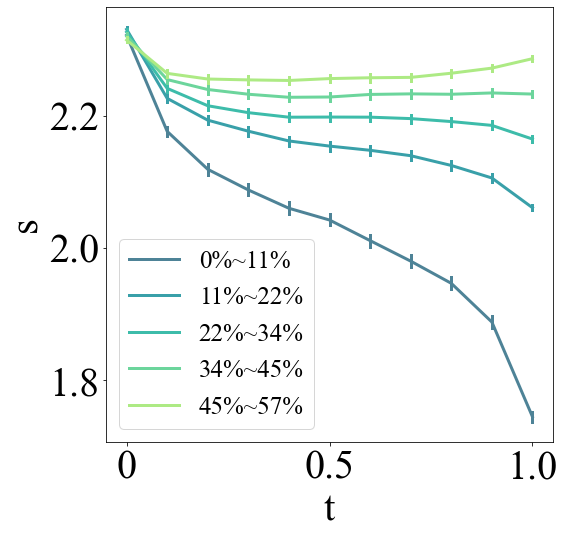

In [10]:
# fig1b
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 40

with open(path+'fig1b_preprocessed.pkl', 'rb') as f: 
    param_dict = pickle.load(f)
all_dfs = param_dict['all_dfs']

fig = plt.figure(figsize=(8, 8))
sns.lineplot(data=all_dfs, x='variable', y='value', hue='thres', linewidth=3, err_style='bars', err_kws={'elinewidth':3},legend=False, 
             palette=['#4E8397', '#39A0A9', '#3DBCAA', '#6CD59C', '#ADEA84'])
plt.xticks([0, 5, 10], [0, '0.5', '1.0'])
plt.xlabel('t')
plt.ylabel('s')
plt.legend(labels=['0%~11%', '11%~22%', '22%~34%', '34%~45%', '45%~57%'], fontsize=25)

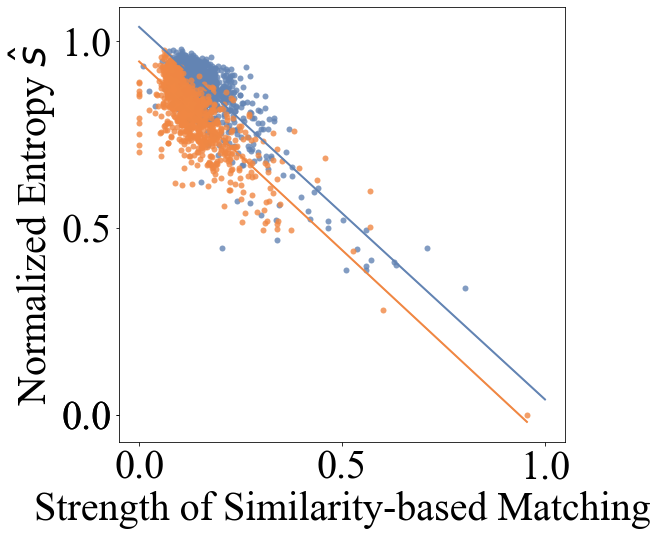

In [11]:
# fig1c
plt.rcParams['font.size'] = 40
plt.rcParams['font.sans-serif'] = 'Times New Roman'

with open(path+'fig1d_preprocessed.pkl', 'rb') as f: 
    param_dict = pickle.load(f)

with open(path+'fig1d_sampled_nodes.pkl', 'rb') as f: 
    sampled_node = pickle.load(f)
    
X_video = param_dict['X_video']
upper_video_f = param_dict['upper_video_f']
lower_video_f = param_dict['lower_video_f']
mean_video_f = param_dict['mean_video_f']

X_news = param_dict['X_news']
upper_news_f = param_dict['upper_news_f']
lower_news_f = param_dict['lower_news_f']
mean_news_f = param_dict['mean_news_f']

video_nodes = sampled_node['video_nodes']
news_nodes = sampled_node['news_nodes']

fig, ax = plt.subplots(figsize=(8, 8), ncols=1, nrows=1)

X_news_sampled = np.linspace(np.min(X_news), np.max(X_news), 101)
ax.plot(X_news_sampled, mean_news_f(X_news_sampled), '-', linewidth=2, color='#6384B3',label='News')
ax.fill_between(X_news_sampled, lower_news_f(X_news_sampled), upper_news_f(X_news_sampled), color='#6384B3', alpha=0.4)


X_video_sampled = np.linspace(np.min(X_video), np.max(X_video), 101)
ax.plot(X_video_sampled, mean_video_f(X_video_sampled), '-', linewidth=2, color='#F08743', label='Video')
ax.fill_between(X_video_sampled, lower_video_f(X_video_sampled), upper_video_f(X_video_sampled), color='#F08743', alpha=0.4)

sns.scatterplot(data=news_nodes, x='sim_strength', y='normalized_entropy', color='#6384B3', linewidth=0, alpha=0.8)
sns.scatterplot(data=video_nodes, x='sim_strength', y='normalized_entropy', color='#F08743', linewidth=0, alpha=0.8)

plt.yticks([0,0.5,1,0])
plt.xlabel('Strength of Similarity-based Matching')
plt.ylabel(r'Normalized Entropy $\hat{s}$')
plt.legend([],[], frameon=False)

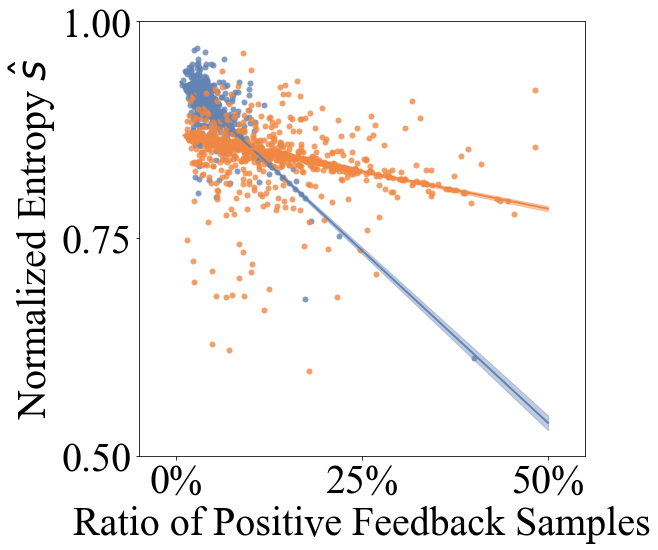

In [12]:
# fig1d
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 40

with open(path+'fig1e_preprocessed.pkl', 'rb') as f: 
    param_dict = pickle.load(f)

with open(path+'fig1e_sampled_nodes.pkl', 'rb') as f: 
    sampled_node = pickle.load(f)
    
X_video = param_dict['X_video']
upper_video_f = param_dict['upper_video_f']
lower_video_f = param_dict['lower_video_f']
mean_video_f = param_dict['mean_video_f']

X_news = param_dict['X_news']
upper_news_f = param_dict['upper_news_f']
lower_news_f = param_dict['lower_news_f']
mean_news_f = param_dict['mean_news_f']

video_nodes = sampled_node['video_nodes']
news_nodes = sampled_node['news_nodes']


fig = plt.figure(figsize=(8, 8))


X_news_sampled = np.linspace(np.min(X_news), np.max(X_news), 101)
plt.plot(X_news_sampled, mean_news_f(X_news_sampled), '-', linewidth=2, color='#6384B3',label='News')
plt.fill_between(X_news_sampled, lower_news_f(X_news_sampled), upper_news_f(X_news_sampled), color='#6384B3', alpha=0.4)


X_video_sampled = np.linspace(np.min(X_video), np.max(X_video), 101)
plt.plot(X_video_sampled, mean_video_f(X_video_sampled), '-', linewidth=2, color='#F08743', label='Video')
plt.fill_between(X_video_sampled, lower_video_f(X_video_sampled), upper_video_f(X_video_sampled), color='#F08743', alpha=0.4)

sns.scatterplot(data=news_nodes, x='pos_ratio', y='normalized_entropy',color='#6384B3', linewidth=0, alpha=0.8)
sns.scatterplot(data=video_nodes, x='pos_ratio', y='normalized_entropy', color='#F08743',linewidth=0, alpha=0.8)


plt.ylim(0.5, 1)
plt.xticks([0,0.25,0.5], ['0%','25%', '50%'])
plt.yticks([0.5, 0.75, 1.0])
plt.xlim(-0.05, 0.55)
plt.xlabel('Ratio of Positive Feedback Samples')
plt.ylabel(r'Normalized Entropy $\hat{s}$')
plt.legend([],[], frameon=False)

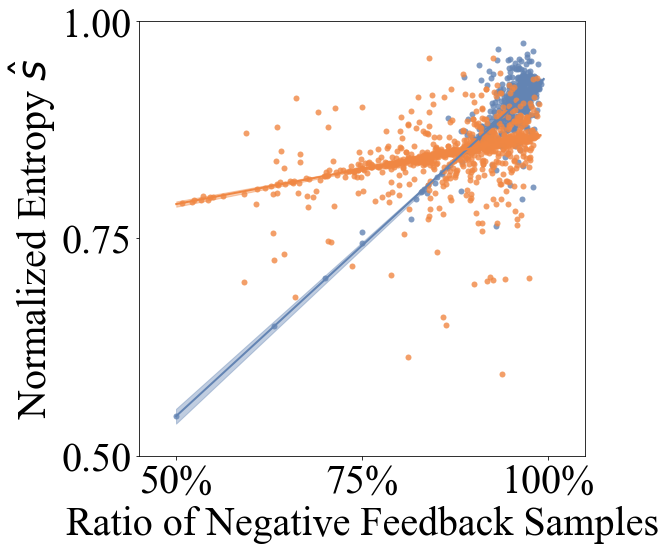

In [13]:
# fig1e
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 40

with open(path+'fig1f_preprocessed.pkl', 'rb') as f: 
    param_dict = pickle.load(f)

with open(path+'fig1f_sampled_nodes.pkl', 'rb') as f: 
    sampled_node = pickle.load(f)
    
X_video = param_dict['X_video']
upper_video_f = param_dict['upper_video_f']
lower_video_f = param_dict['lower_video_f']
mean_video_f = param_dict['mean_video_f']

X_news = param_dict['X_news']
upper_news_f = param_dict['upper_news_f']
lower_news_f = param_dict['lower_news_f']
mean_news_f = param_dict['mean_news_f']

video_nodes = sampled_node['video_nodes']
news_nodes = sampled_node['news_nodes']

fig = plt.figure(figsize=(8, 8))

X_news_sampled = np.linspace(np.min(X_news), np.max(X_news), 101)
plt.plot(X_news_sampled, mean_news_f(X_news_sampled), '-', linewidth=2, color='#6384B3',label='News')
plt.fill_between(X_news_sampled, lower_news_f(X_news_sampled), upper_news_f(X_news_sampled), color='#6384B3', alpha=0.4)


X_video_sampled = np.linspace(np.min(X_video), np.max(X_video), 101)
plt.plot(X_video_sampled, mean_video_f(X_video_sampled), '-', linewidth=2, color='#F08743', label='Video')
plt.fill_between(X_video_sampled, lower_video_f(X_video_sampled), upper_video_f(X_video_sampled), color='#F08743', alpha=0.4)

sns.scatterplot(data=news_nodes, x='neg_ratio', y='normalized_entropy',color='#6384B3', linewidth=0, alpha=0.8)
sns.scatterplot(data=video_nodes, x='neg_ratio', y='normalized_entropy', color='#F08743',linewidth=0, alpha=0.8)



plt.ylim(0.5, 1)
plt.xticks([0.5,0.75,1.0], ['50%','75%', '100%'])
plt.yticks([0.5, 0.75, 1.0])
plt.xlim(0.45, 1.05)
plt.xlabel('Ratio of Negative Feedback Samples')
plt.ylabel(r'Normalized Entropy $\hat{s}$')

plt.legend([],[], frameon=False)